<a href="https://colab.research.google.com/github/Fraffita/TP_Netflix/blob/main/TP_Chona_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP N°1
### Integrantes: Franco Raffaele, Joaquin Orqueda y Mateo Perez

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from collections import Counter
from datetime import datetime
import seaborn as sns
import operator

In [2]:
!gdown https://drive.google.com/uc?id=1rpSEjZFQCE8dS9RKQzpxI7qW-mFveA12

Downloading...
From: https://drive.google.com/uc?id=1rpSEjZFQCE8dS9RKQzpxI7qW-mFveA12
To: /content/NetflixHistory.csv
100% 2.13M/2.13M [00:00<00:00, 189MB/s]


## Pre-processing

### Primero creamos un dataframe a partir del archivo

In [3]:
df = pd.read_csv("NetflixHistory.csv")

### Aquí nos encargamos de eliminar todos los datos de las filas de dispositivos a ignorar

In [4]:
unwanted_words = ["Apple iPhone 6s", "Sony PS4", "Netflix Windows App - Cadmium Windows Mobile", "Apple iPhone 7 Plus (CDMA)", "Chrome PC (Cadmium)", "Samsung 2015 NT14M DTV Smart TV", "iPhone 5S GSM", "Google Chromecast V3 Streaming Stick"]
for word in unwanted_words:
  df = df[df["Device Type"] != word]

df
#Como se ve solo se imprimen valores donde contienen dispositivos distintos a la lista de palabras indeseadas

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,0,Chona,2022-08-21 19:54:53,00:02:54,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina)
1,1,Chona,2022-08-21 19:33:17,00:21:33,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina)
2,2,Chona,2022-08-21 19:11:40,00:21:28,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina)
3,3,Chona,2022-08-21 18:50:27,00:20:41,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina)
4,4,Chona,2022-08-21 18:16:34,00:21:20,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015-01-08 19:21:21,00:04:09,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina)
12993,12993,Chona,2015-01-08 19:20:47,00:00:15,NaN,Lost: Temporada 1: Nacida para correr (Capítul...,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina)
12994,12994,Chona,2015-01-08 19:18:32,00:00:37,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina)
12995,12995,Chona,2015-01-08 19:16:45,00:00:18,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina)


### En esta sección se encuentran funciones que se aplican en este momento para ser utilizadas en ejercicio posteriores

#### Esta función pasa todos los tiempos de la columna duración a segundos, con el objetivo de poder realizar operaciones numéricas (segundos en este caso)

In [5]:
h = ""
m = ""
s = ""
def duration_toseconds(input):
   if (type(input) == str):
    h, m, s = input.split(':')
    return int(h) * 60 * 60 + int(m) * 60 + int(s)
   return input

df["Duration"] = df["Duration"].apply(duration_toseconds)

#### Estas dos funciones son para calcular el día y la hora (respectivamente) de los programas vistos

In [6]:
def dayColumn(input):
  date = datetime.strptime(input, '%Y-%m-%d %H:%M:%S')
  date = (date.strftime("%Y-%B-%A-%d %H:%M:%S"))
  res = ""

  for a in date:
    if a == "-" or a == " " or a == ":":
      res += "."
    else: 
      res += a

  res = res.split(".")

  return res[2]

In [7]:
def hourColumn(input):
  date = datetime.strptime(input, '%Y-%m-%d %H:%M:%S')
  date = (date.strftime("%Y-%B-%A-%d %H:%M:%S"))
  res = ""

  for a in date:
    if a == "-" or a == " " or a == ":":
      res += "."
    else: 
      res += a

  res = res.split(".")

  return res[4]

In [8]:
df["Day"] = df["Start Time"].apply(dayColumn)
df["Hour"] = df["Start Time"].apply(hourColumn)
df

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Day,Hour
0,0,Chona,2022-08-21 19:54:53,174,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina),Sunday,19
1,1,Chona,2022-08-21 19:33:17,1293,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina),Sunday,19
2,2,Chona,2022-08-21 19:11:40,1288,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina),Sunday,19
3,3,Chona,2022-08-21 18:50:27,1241,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina),Sunday,18
4,4,Chona,2022-08-21 18:16:34,1280,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina),Sunday,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015-01-08 19:21:21,249,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina),Thursday,19
12993,12993,Chona,2015-01-08 19:20:47,15,NaN,Lost: Temporada 1: Nacida para correr (Capítul...,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina),Thursday,19
12994,12994,Chona,2015-01-08 19:18:32,37,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina),Thursday,19
12995,12995,Chona,2015-01-08 19:16:45,18,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina),Thursday,19


## Ejercicio A

#### Utilizamos la función Counter que "cuenta" las veces que aparece cada nombre, en este caso en la columna "Device Type"

In [9]:
c_devices = dict(Counter(df["Device Type"]))
dict_devices = dict(sorted(c_devices.items(), key=operator.itemgetter(1),reverse=True))

max_device = None
max_device_time = 0

for k,v in c_devices.items():
 if v > max_device_time:
   max_device_time = v
   max_device = k

print("El dispositivo más usado es el", max_device, "y fue utilizado", max_device_time, "veces")

El dispositivo más usado es el Apple Apple TV 4 Apple TV y fue utilizado 3519 veces


## Ejercicio B

### Para clasificar si el programa es una película, serie, u otro, programamos esta función que se basa en la cantidad de ":" que contenga en su nombre

In [36]:
def title_type(title, SVT):
    if not pd.isnull(SVT):
     return "Otros"
    else:
      if title.count(":") >= 2:
       return "Serie"
      else:
       return "Película"
      

### Luego aplicamos esta función en el dataframe y creamos una columna para ver los resultados, la que a continuación sirve para dejar solo a las películas

In [26]:
df["Title Type"] = df.apply(lambda x: title_type(x['Title'], x['Supplemental Video Type']), axis=1)
df_pelis = df.drop(df[(df['Title Type'] == "Otros") | (df['Title Type'] == "Serie")].index)
df_pelis

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Day,Hour,Title Type,Año
89,89,Chona,2022-07-16 22:28:48,6003,NaN,Mr. Holmes,NaN,Apple Apple TV 4 Apple TV,01:39:52,01:39:52,AR (Argentina),Saturday,22,Película,2022
157,157,Chona,2022-03-29 01:35:31,2331,NaN,Baby: El aprendiz del crimen,NaN,Apple Apple TV 4 Apple TV,01:49:05,01:49:05,AR (Argentina),Tuesday,01,Película,2022
158,158,Chona,2022-03-28 22:04:54,4294,NaN,Baby: El aprendiz del crimen,NaN,Apple Apple TV 4 Apple TV,01:11:35,Not latest view,AR (Argentina),Monday,22,Película,2022
294,294,Chona,2021-12-29 18:15:16,7372,NaN,El Hombre Araña 2,NaN,Apple Apple TV 4 Apple TV,02:02:53,02:02:53,AR (Argentina),Wednesday,18,Película,2021
296,296,Chona,2021-12-28 03:21:55,6975,NaN,El hombre araña,NaN,Apple Apple TV 4 Apple TV,01:55:55,01:55:55,AR (Argentina),Tuesday,03,Película,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12868,12868,Chona,2015-01-20 00:49:39,5361,NaN,Flubber y el profesor chiflado,NaN,Apple TV 3 (revised),01:29:21,01:29:21,AR (Argentina),Tuesday,00,Película,2015
12869,12869,Chona,2015-01-20 00:20:46,32,NaN,Toy Story: una historia de terror,NaN,Apple TV 3 (revised),00:21:39,00:21:39,AR (Argentina),Tuesday,00,Película,2015
12894,12894,Chona,2015-01-16 00:48:04,5642,NaN,Pesos pesados,NaN,Apple TV 3 (revised),01:34:01,01:34:01,AR (Argentina),Friday,00,Película,2015
12895,12895,Chona,2015-01-16 00:30:53,1,NaN,Pesos pesados,NaN,Apple TV 3 (revised),00:00:01,Not latest view,AR (Argentina),Friday,00,Película,2015


### Ahora sí, solo con las películas creamos un diccionario que almacene las veces que fue vista cada película

In [27]:
list_titles = list(df_pelis["Title"])
dict_ocurrencias = dict(Counter(list_titles))

In [28]:
max_peli = 0
nom_maxpeli = None

for key, value in dict_ocurrencias.items():
  if value > max_peli:
   max_peli = value
   nombrePeli = key

print("La película más vista fue", nombrePeli, "y fue vista", max_peli, "veces")

La película más vista fue Star Wars: El Imperio contraataca y fue vista 7 veces


### En cuanto a la película más larga, creamos otro diccionario pero que almacena las duraciones de cada

In [12]:
dict_pelis = df_pelis.set_index('Duration').to_dict()['Title']

In [13]:
max = 0
nom_pelimax = None

for time2, nom2 in dict_pelis.items():
  if time2 > max:
    max = time2
    nom_pelimax = nom2

print("La película más larga es",nom_pelimax,"y dura",max,"segundos")

La película más larga es El club de la pelea y dura 8411 segundos


## Ejercicio C

### Lo primero que hicimos fue filtrar las películas y otros, para que solo trabajemos con series

In [14]:
df_series = df.drop(df[(df['Title Type'] == "Otros") | (df['Title Type'] == "Película")].index)

def nom_serie(input):
  nom = input.split(":")
  return nom[0]
  
df_series["Serie Name"] = df_series["Title"].apply(nom_serie)

### Punto 1:


#### aquí codeamos un diccionario para almecenar el título de la serie como `key`, y los segundos totales de la suma de sus capítulos vistos como `value`

In [35]:
dict_series_dur = {}

for i in df_series["Serie Name"]:
  sum_dur = df_series.loc[df_series['Serie Name'] == i, 'Duration'].sum()
  dict_series_dur[i] = sum_dur

dict_series_dur

{'Community': 807438,
 'The Good Place': 77795,
 'Better Call Saul': 85325,
 'Stranger Things': 117240,
 'Brooklyn Nine-Nine': 306755,
 'Designated Survivor': 197134,
 'Casi feliz': 2684,
 'La ley de los audaces': 637377,
 'Marvel - Daredevil': 119497,
 'Atlanta': 62509,
 'El código de la discordia': 14881,
 'Archer': 93777,
 'Punto de inflexión': 18305,
 'El juego del calamar': 25729,
 'Los Simuladores': 6470,
 'Close Enough': 6,
 'Rick y Morty': 112810,
 'How to Sell Drugs Online (Fast)': 17524,
 'Legion': 3292,
 'Historia': 55,
 'El arte del espionaje': 4,
 'Cobra Kai': 19033,
 'Big Mouth': 62309,
 'Narcos': 91740,
 'BoJack Horseman': 115400,
 'Friends': 690936,
 'The Promised Neverland': 14873,
 'Juegos locales': 33,
 'Avatar': 80413,
 'Bill Gates bajo la lupa': 8366,
 'Especial 20 años Fútbol de Primera': 2,
 'Middleditch & Schwartz': 924,
 'Madam C. J. Walker': 10281,
 'Élite': 69969,
 'Power Rangers Dino Thunder': 5772,
 'The Inbetweeners': 37155,
 'Nisman': 3216,
 'Star Wars Re

#### luego los ordenamos con el método `sorted` y borramos todos los items del décimo puesto para abajo

In [30]:
top10series_dur = dict(sorted(dict_series_dur.items(), key=operator.itemgetter(1),reverse=True))
for_top10 = list(top10series_dur)

for x in for_top10:
 if for_top10.index(x) > 9:
  del top10series_dur[x]

#### Por último, ploteamos el top 10 con barras indicando cuantos segundos totales se vieron por cada serie

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

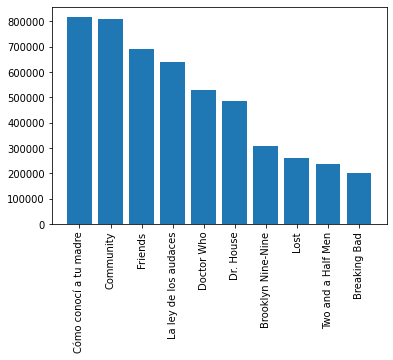

In [31]:
keys = top10series_dur.keys()
values = top10series_dur.values()

plt.bar(keys, values)
plt.xticks(rotation=90)

### Punto 2

#### Realizamos otro dictionario pero esta vez con las veces que aparece el nombre de la serie en la columna `"Serie Name"`

In [37]:
dict_series_oc = dict(Counter(df_series["Serie Name"]))

top10series_oc = dict(sorted(dict_series_oc.items(), key=operator.itemgetter(1),reverse=True))
for_top10 = list(top10series_oc)

for x in for_top10:
 if for_top10.index(x) > 9:
  del top10series_oc[x]

#### y ploteamos un top 10 de las series por cantidad de veces más vistas

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

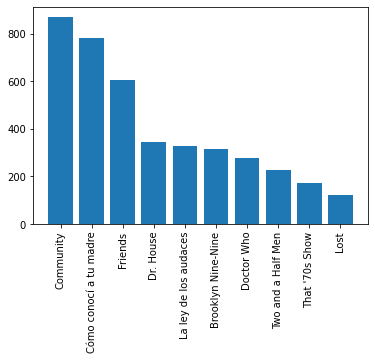

In [33]:
keys = top10series_oc.keys()
values = top10series_oc.values()

plt.bar(keys, values)
plt.xticks(rotation=90)

## Ejercicio D

In [17]:
df_semana = pd.DataFrame()

In [18]:
lista_dias = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df_semana["Day"] = lista_dias

lista_horas = ["00", "02", "04", "06", "08", "10", "12", "14", "16", "18", "20", "22"]
for hora in lista_horas:
  df_semana[hora] = 0

dict_DyH = { "Monday":0,"Tuesday":1,"Wednesday":2,"Thursday":3,"Friday":4,"Saturday":5,"Sunday":6}

In [19]:
for hora in lista_horas:
  for dia in df_semana[df_semana["Day"] != None]["Day"]:
    df_semana.at[dict_DyH[dia], hora] = df.loc[(df['Day'] == dia) & (df["Hour"] == hora)].count()[0]

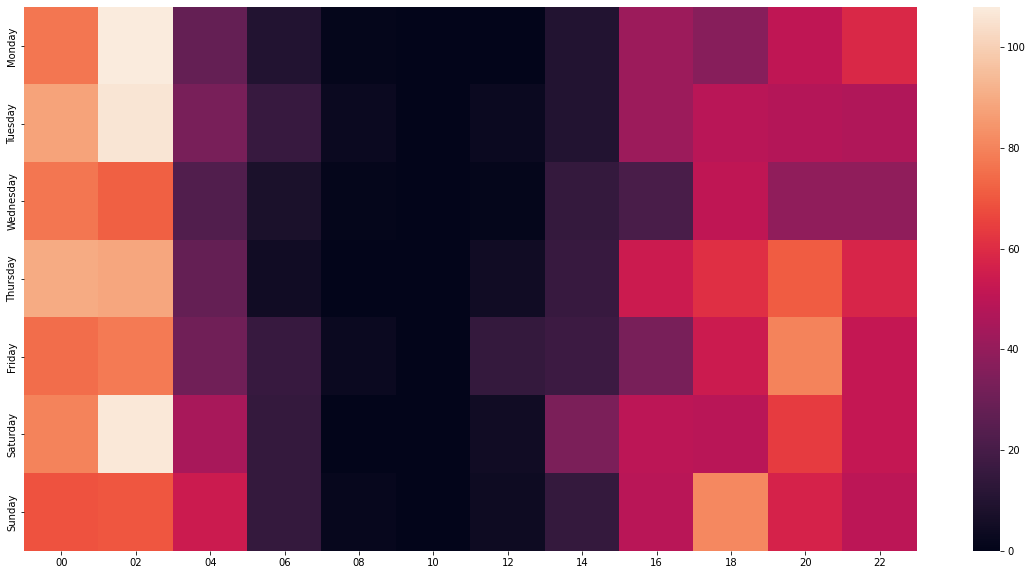

In [20]:
df_semana = df_semana.drop('Day', axis=1)

plt.figure(figsize = (20,10))
sns.heatmap(df_semana, yticklabels = lista_dias)

## Ejercicio E

In [21]:
def año(input):
  return input[0:4]

df["Año"] = df["Start Time"].apply(año)

In [22]:
titulos_total = df.groupby(["Title", "Año"]).size().reset_index()

años_vistos = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

años_titulos = {}

for i in años_vistos:
  años_titulos[i] = titulos_total[titulos_total["Año"] == i][0].count()

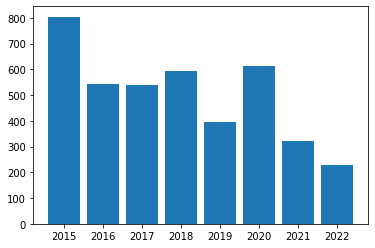

In [23]:
plt.bar(años_titulos.keys(), años_titulos.values())
plt.show()
#El gráfico muestra la visualización total de cada año por todos los programas del historial

## Ejercicio F

In [24]:
total_dias = int(df["Duration"].sum() / 60 / 60 / 24)
print("Todos los programas suman un total de", str(total_dias), "días reproducidos")

Todos los programas suman un total de 99 días reproducidos
